In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os,glob
import math
import micasense.capture as capture
%matplotlib inline

imagePath = os.path.join('.','data','MISTSET','000')
imageNames = glob.glob(os.path.join(imagePath,'IMG_0096_*.tif'))

# Read raw image DN values
# reads 16 bit tif - this will likely not work for 12 bit images
index = 0
imageRaws = np.ndarray(shape = (960,1280,5))
for names in imageNames:
    imageRaws[:,:,index] = plt.imread(names)
    index = index + 1

In [2]:
print(imageRaws)
print(imageRaws.shape)

[[[17040. 13888. 14864. 13456. 24064.]
  [17040. 13168. 16640. 11744. 23808.]
  [15296. 14928. 16688. 12656. 23296.]
  ...
  [21472. 14896. 17760. 16000. 28816.]
  [19616. 17376. 18960. 15840. 27984.]
  [20400. 17424. 18128. 14768. 28048.]]

 [[18672. 13056. 18848. 13536. 23296.]
  [15584. 15280. 17648. 12576. 22192.]
  [15072. 15856. 17568. 12784. 24768.]
  ...
  [18544. 16064. 17344. 14560. 27296.]
  [17760. 16080. 17120. 13968. 26208.]
  [18736. 18032. 15888. 13136. 25776.]]

 [[17168. 12256. 18768. 12624. 25440.]
  [18848. 13904. 18592. 13696. 25792.]
  [17536. 16912. 18880. 12432. 25296.]
  ...
  [15792. 16608. 15792. 13136. 26448.]
  [19600. 17056. 15904. 12656. 26960.]
  [19712. 17312. 15824. 14432. 26992.]]

 ...

 [[18944. 14416. 16560. 13024. 22352.]
  [19120. 14160. 17024. 13744. 23280.]
  [20144. 14992. 16608. 13184. 25040.]
  ...
  [20272. 14176. 17200. 13856. 22448.]
  [20176. 15232. 18272. 14240. 23968.]
  [21040. 13664. 18608. 14560. 24384.]]

 [[16944. 15792. 18736. 13

<Figure size 432x288 with 0 Axes>

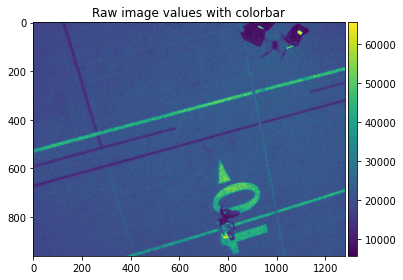

In [3]:
import micasense.plotutils as plotutils

# Optional: pick a color map that fits your viewing style
# one of 'gray, viridis, plasma, inferno, magma, nipy_spectral'
plotutils.colormap('viridis'); 

fig = plotutils.plotwithcolorbar(imageRaws[:,:,0], title='Raw image values with colorbar')

In [4]:
# reshape imageRaws for covariance calculation
reshape_images = imageRaws.transpose(0,1,2).reshape((960*1280,5))
#reshape_images = reshape_images.transpose(1,0)
print(imageRaws[0,0,:])
print(reshape_images)
print(reshape_images.shape)

[17040. 13888. 14864. 13456. 24064.]
[[17040. 13888. 14864. 13456. 24064.]
 [17040. 13168. 16640. 11744. 23808.]
 [15296. 14928. 16688. 12656. 23296.]
 ...
 [20144. 14224. 17584. 14240. 23776.]
 [20272. 13952. 18480. 13904. 24832.]
 [21392. 14512. 17872. 14944. 24656.]]
(1228800, 5)


In [5]:
# covariance matrix
M = np.cov(reshape_images, rowvar = False)
print(M.shape)
# print(M)

(5, 5)


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(M)
print(eigenvalues)
print(eigenvectors)

[95076862.2935772  40122397.3672571   8715292.70628752 12759697.2428613
 14625255.45404816]
[[-0.45987845 -0.11218091  0.65798596 -0.54573336  0.21250136]
 [-0.33766147  0.77166252 -0.04900859 -0.13542089 -0.5194045 ]
 [-0.5302496  -0.19469868 -0.73331451 -0.31661859  0.20719626]
 [-0.55864341 -0.40952094  0.14879423  0.57500231 -0.40919771]
 [-0.2850429   0.43166819  0.0690126   0.50295258  0.68897684]]


In [7]:
e = np.ndarray(shape = (5,3))
e[:,0] = eigenvectors[:,0]
e[:,1] = eigenvectors[:,1]
e[:,2] = eigenvectors[:,4]

color_vector = np.dot(reshape_images,e)
print(color_vector)

[[-34783.77928371  10788.43471993  10560.67302872]
 [-34453.01781475  10477.64565662  11826.7932352 ]
 [-34634.26678006  11427.57244308   9826.0399092 ]
 ...
 [-38122.85922371   9724.53853408  11090.09484613]
 [-38678.2845022    9919.27780142  12309.27086389]
 [-39590.86862731   9842.26760918  11583.6050052 ]]


In [8]:
his0 = np.histogram(color_vector[:,0])
his1 = np.histogram(color_vector[:,1])
his2 = np.histogram(color_vector[:,2])

print(his0)
print(his1)
print(his2)

(array([    351,    2419,    6314,   15424,   16400,   23793,   78640,
       1030753,   44431,   10275]), array([-130901.29478043, -119398.0195272 , -107894.74427398,
        -96391.46902075,  -84888.19376752,  -73384.9185143 ,
        -61881.64326107,  -50378.36800785,  -38875.09275462,
        -27371.81750139,  -15868.54224817]))
(array([    112,     376,   17116,   38996, 1045606,   86877,   20634,
         16927,    2097,      59]), array([-36449.56308684, -25604.78195309, -14760.00081934,  -3915.21968558,
         6929.56144817,  17774.34258192,  28619.12371568,  39463.90484943,
        50308.68598318,  61153.46711694,  71998.24825069]))
(array([     16,     251,     352,    3747,  106026, 1097838,   17734,
          2268,     510,      58]), array([-44339.51166263, -33443.28899055, -22547.06631847, -11650.84364639,
         -754.62097431,  10141.60169777,  21037.82436985,  31934.04704192,
        42830.269714  ,  53726.49238608,  64622.71505816]))


In [9]:
quant = np.ndarray(shape = (960*1280,3))
quant[:,0] = np.searchsorted(his0[1],color_vector[:,0])-1
quant[:,1] = np.searchsorted(his1[1],color_vector[:,1])-1
quant[:,2] = np.searchsorted(his2[1],color_vector[:,2])-1

quant

array([[8., 4., 5.],
       [8., 4., 5.],
       [8., 4., 4.],
       ...,
       [8., 4., 5.],
       [8., 4., 5.],
       [7., 4., 5.]])

In [10]:
image_quant = quant.reshape(960,1280,3)
print(image_quant)

[[[8. 4. 5.]
  [8. 4. 5.]
  [8. 4. 4.]
  ...
  [7. 4. 5.]
  [7. 4. 5.]
  [7. 4. 5.]]

 [[8. 4. 5.]
  [8. 4. 4.]
  [8. 4. 5.]
  ...
  [7. 4. 5.]
  [8. 4. 5.]
  [8. 4. 5.]]

 [[8. 4. 5.]
  [8. 4. 5.]
  [8. 4. 5.]
  ...
  [8. 4. 5.]
  [8. 4. 5.]
  [7. 4. 5.]]

 ...

 [[8. 4. 4.]
  [8. 4. 5.]
  [8. 4. 5.]
  ...
  [8. 4. 5.]
  [7. 4. 5.]
  [7. 4. 5.]]

 [[8. 4. 5.]
  [8. 4. 5.]
  [8. 4. 5.]
  ...
  [8. 4. 5.]
  [8. 4. 5.]
  [8. 4. 5.]]

 [[8. 4. 4.]
  [8. 4. 4.]
  [8. 4. 4.]
  ...
  [8. 4. 5.]
  [8. 4. 5.]
  [7. 4. 5.]]]


In [11]:
image_saliency = np.ndarray(shape = (960,1280))
delta = np.ndarray(shape = (3))
delta[0] = his0[1][1] - his0[1][0]
delta[1] = his1[1][1] - his1[1][0]
delta[2] = his2[1][1] - his2[1][0]

freq = np.ndarray(shape = (10,3))
freq[:,0] = his0[0]/(960*1280)
freq[:,1] = his1[0]/(960*1280)
freq[:,2] = his2[0]/(960*1280)

idx = np.array([0,1,2,3,4,5,6,7,8,9])

for (x, y), value in np.ndenumerate(image_quant[:,:,0]):
    image_saliency[x,y] = delta[0]*(np.dot(freq[:,0], np.absolute(idx - image_quant[x,y,0]))) \
    + delta[1]*(np.dot(freq[:,1], np.absolute(idx - image_quant[x,y,1]))) \
    + delta[2]*(np.dot(freq[:,2], np.absolute(idx - image_quant[x,y,2])))

In [12]:
#normalize
sal_max = np.max(image_saliency)
sal_min = np.min(image_saliency)

image_saliency_norm = (image_saliency - sal_min)/(sal_max - sal_min)

print(image_saliency_norm)

[[0.08961668 0.08961668 0.16605834 ... 0.         0.         0.        ]
 [0.08961668 0.16605834 0.08961668 ... 0.         0.08961668 0.08961668]
 [0.08961668 0.08961668 0.08961668 ... 0.08961668 0.08961668 0.        ]
 ...
 [0.16605834 0.08961668 0.08961668 ... 0.08961668 0.         0.        ]
 [0.08961668 0.08961668 0.08961668 ... 0.08961668 0.08961668 0.08961668]
 [0.16605834 0.16605834 0.16605834 ... 0.08961668 0.08961668 0.        ]]


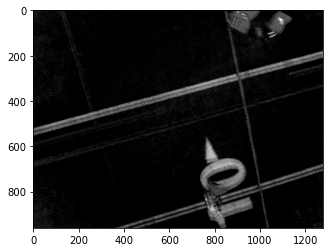

In [13]:
plt.imshow(image_saliency_norm, cmap = 'gray')